In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import heartpy as hp
import matplotlib.pyplot as plt
import neurokit2 as nk
from scipy import signal

In [2]:
tf.__version__

'2.5.0'

In [3]:
dataset_path = "/KULIAH/Sihedaf/Dataset"
dir_list = os.listdir(dataset_path)

print("Files and directories in '", dataset_path, "' :")
 
# print the list
print(dir_list)

Files and directories in ' /KULIAH/Sihedaf/Dataset ' :
['AF1KOSONG.csv', 'AF2KOSONG.csv', 'AF3KOSONG.csv', 'AF4KOSONG.csv', 'AF5KOSONG.csv', 'normal1.csv', 'normal2.csv', 'normal3.csv', 'normal4.csv', 'normal5.csv', 'normal6.csv', 'normal7.csv', 'normal8.csv']


In [4]:
AF1 = pd.read_csv(r'D:\KULIAH\Sihedaf\Dataset\AF1KOSONG.csv')
AF2 = pd.read_csv(r'D:\KULIAH\Sihedaf\Dataset\AF2KOSONG.csv')
AF3 = pd.read_csv(r'D:\KULIAH\Sihedaf\Dataset\AF3KOSONG.csv')
AF4 = pd.read_csv(r'D:\KULIAH\Sihedaf\Dataset\AF4KOSONG.csv')
AF5 = pd.read_csv(r'D:\KULIAH\Sihedaf\Dataset\AF5KOSONG.csv')

normal1 = pd.read_csv(r'D:\KULIAH\Sihedaf\Dataset\normal1.csv')
normal2 = pd.read_csv(r'D:\KULIAH\Sihedaf\Dataset\normal2.csv')
normal3 = pd.read_csv(r'D:\KULIAH\Sihedaf\Dataset\normal3.csv')
normal4 = pd.read_csv(r'D:\KULIAH\Sihedaf\Dataset\normal4.csv')
normal5 = pd.read_csv(r'D:\KULIAH\Sihedaf\Dataset\normal5.csv')
normal6 = pd.read_csv(r'D:\KULIAH\Sihedaf\Dataset\normal6.csv')
normal7 = pd.read_csv(r'D:\KULIAH\Sihedaf\Dataset\normal7.csv')
normal8 = pd.read_csv(r'D:\KULIAH\Sihedaf\Dataset\normal8.csv')

In [5]:
print("Shape normal 1: ",normal1.shape)
print("Shape normal 2: ",normal2.shape)
print("Shape normal 3: ",normal3.shape)
print("Shape normal 4: ",normal4.shape)
print("Shape normal 5: ",normal5.shape)
print("Shape normal 6: ",normal6.shape)
print("Shape normal 7: ",normal7.shape)
print("Shape normal 8: ",normal8.shape)
print()
print("Shape AF 1: ",AF1.shape)
print("Shape AF 2: ",AF2.shape)
print("Shape AF 3: ",AF3.shape)
print("Shape AF 4: ",AF4.shape)
print("Shape AF 5: ",AF5.shape)

Shape normal 1:  (5464, 2)
Shape normal 2:  (19289, 2)
Shape normal 3:  (19289, 2)
Shape normal 4:  (4666, 2)
Shape normal 5:  (5464, 2)
Shape normal 6:  (19289, 2)
Shape normal 7:  (19289, 2)
Shape normal 8:  (4666, 2)

Shape AF 1:  (18001, 2)
Shape AF 2:  (18001, 2)
Shape AF 3:  (18001, 2)
Shape AF 4:  (18001, 2)
Shape AF 5:  (18001, 2)


In [6]:
def bandPassFilter(data):
    sensor_data = data['Pleth']

    fs = len(data)
    lowcut = 20
    highcut = 50

    nyq = 0.5 *fs
    low = lowcut/nyq
    high = highcut/nyq

    order = 2 
    b,a = signal.butter(order, [low,high], 'bandpass', analog=False)
    y = signal.filtfilt(b, a, sensor_data, axis=0)
    return y

In [7]:
def MAFilter(data, n):
    cumsum = np.cumsum(np.insert(data, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)

In [8]:
# normal1.drop(index=normal1.index[0], axis=0, inplace=True)
# normal2.drop(index=normal2.index[0], axis=0, inplace=True)
# normal3.drop(index=normal3.index[0], axis=0, inplace=True)
# normal4.drop(index=normal4.index[0], axis=0, inplace=True)
# normal5.drop(index=normal5.index[0], axis=0, inplace=True)
# normal6.drop(index=normal6.index[0], axis=0, inplace=True)
# normal7.drop(index=normal7.index[0], axis=0, inplace=True)
# normal8.drop(index=normal8.index[0], axis=0, inplace=True)

# normal1.reset_index(drop=True,inplace=True)
# normal2.reset_index(drop=True,inplace=True)
# normal3.reset_index(drop=True,inplace=True)
# normal4.reset_index(drop=True,inplace=True)
# normal5.reset_index(drop=True,inplace=True)
# normal6.reset_index(drop=True,inplace=True)
# normal7.reset_index(drop=True,inplace=True)
# normal8.reset_index(drop=True,inplace=True)

Visualizing, Slicing, Cleaning and Preprocessing Signal

(5464, 2)


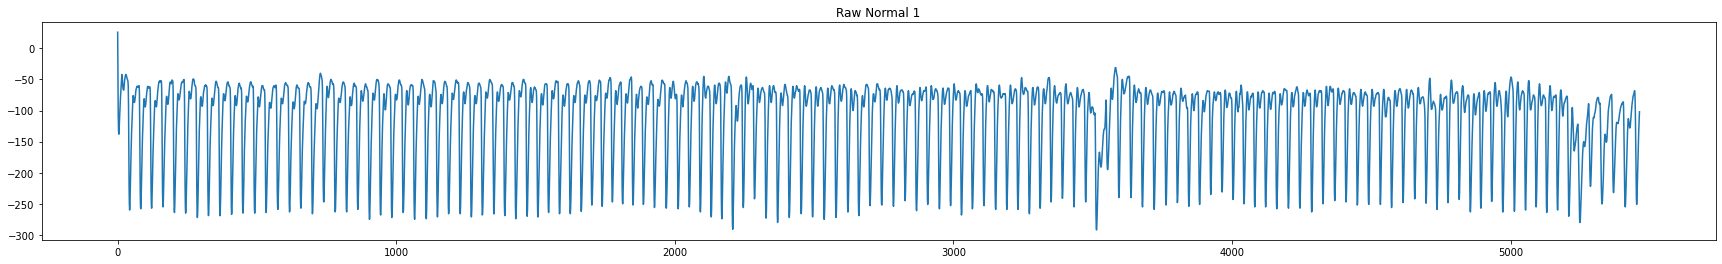

In [9]:
#Normal 1 Signal
print(normal1.shape)
plt.figure(figsize=(30,4))
plt.title("Raw Normal 1")
plt.plot(normal1.index, normal1['Pleth'])

(4964, 2)


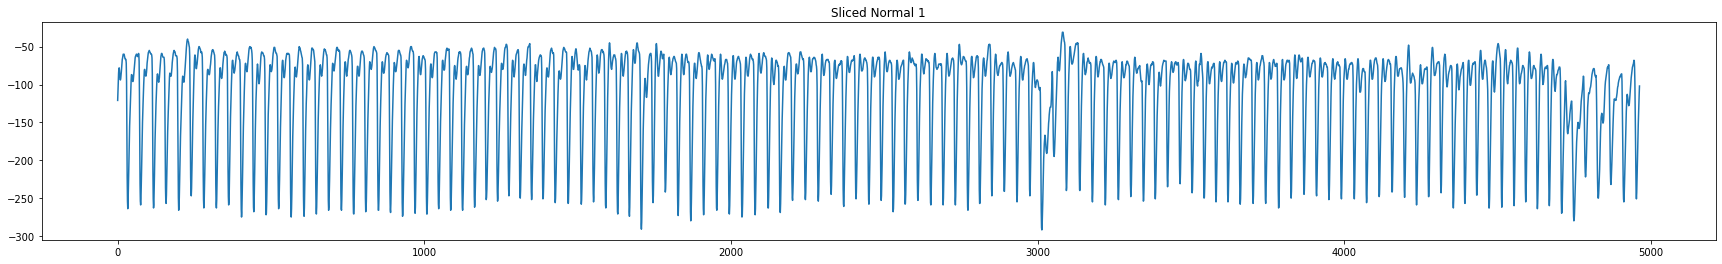

In [10]:
normal1.drop(index=normal1.index[0:500], axis=0, inplace=True)
normal1.reset_index(drop=True,inplace=True)

print(normal1.shape)
plt.figure(figsize=(30,4))
plt.title("Sliced Normal 1")
plt.plot(normal1.index, normal1['Pleth'])

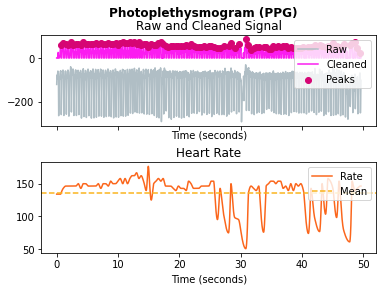

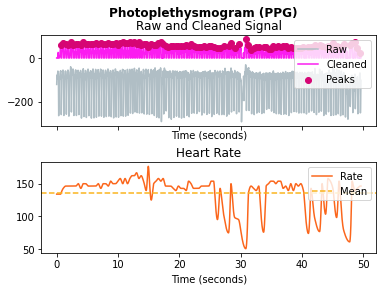

In [11]:
signals_normal1, info = nk.ppg_process(normal1["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_normal1, sampling_rate=100)

In [12]:
raw_feature_normal1 = nk.ppg_intervalrelated(signals_normal1, sampling_rate=100)

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\hrv\hrv_nonlinear.py:483: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\complexity\fractal_higuchi.py:198: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. HFD is returned for kmax value of 20.
  warn(


In [13]:
features_normal1 = raw_feature_normal1[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
features_normal1

HRV_SDNN    HRV_SDSD   HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  128.949861  160.946356  160.199528  33.027523   22.93578     14.826

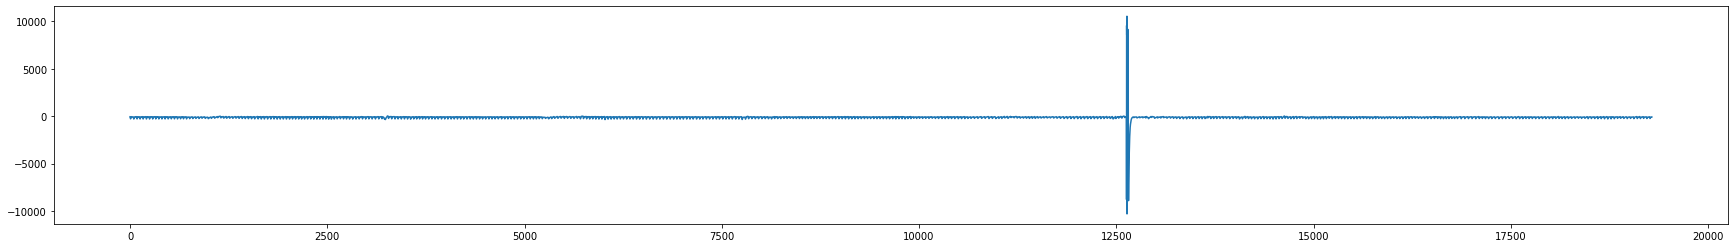

In [14]:
#Normal 2 Signal
plt.figure(figsize=(30,4))
plt.plot(normal2.index, normal2['Pleth'])

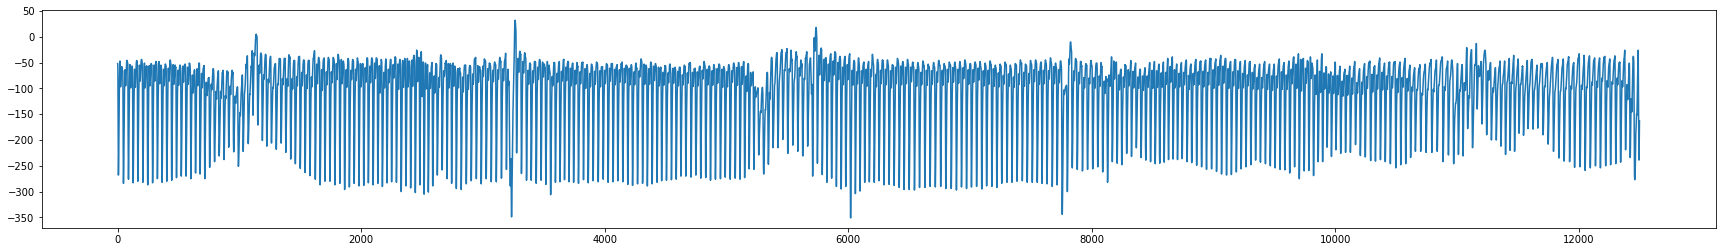

In [15]:
#Normal 2 (1)
plt.figure(figsize=(30,4))
plt.plot(normal2.index[:12500], normal2['Pleth'][:12500])
normal2_1 = normal2[:12500]

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\complexity\fractal_higuchi.py:198: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. HFD is returned for kmax value of 20.
  warn(


    HRV_SDNN   HRV_SDSD  HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  62.753954  89.429662  89.281533  16.831683   5.280528     14.826


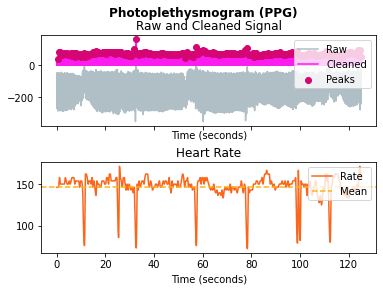

In [16]:
signals_normal2_1, info = nk.ppg_process(normal2_1["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_normal2_1, sampling_rate=100)

raw_feature_normal2_1 = nk.ppg_intervalrelated(signals_normal2_1, sampling_rate=100)

features_normal2_1 = raw_feature_normal2_1[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
print(features_normal2_1)

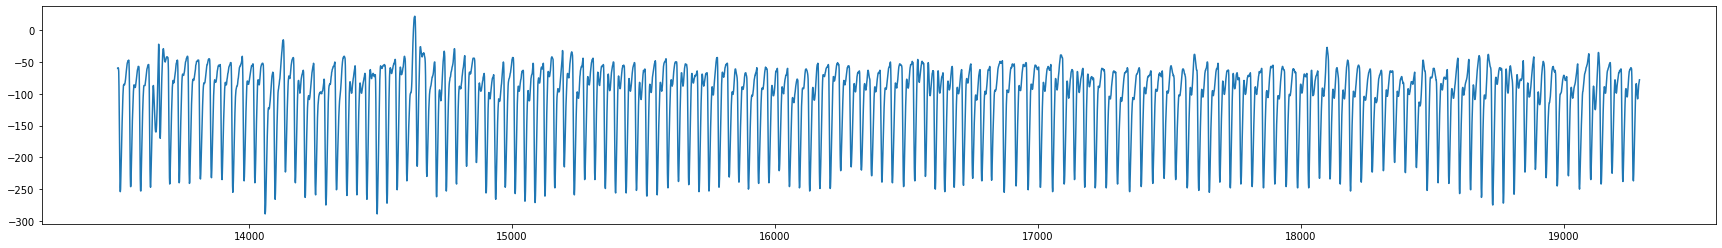

In [17]:
#Normal 2 (2)
plt.figure(figsize=(30,4))
plt.plot(normal2.index[13500:], normal2['Pleth'][13500:])
normal2_2 = normal2[13500:]
normal2_2.reset_index(drop=True,inplace=True)

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\complexity\fractal_higuchi.py:198: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. HFD is returned for kmax value of 20.
  warn(


    HRV_SDNN   HRV_SDSD  HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  62.237165  85.046114  84.737446  25.179856  12.230216     29.652


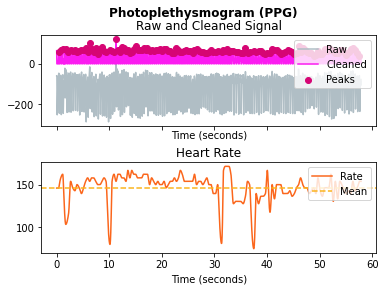

In [18]:
signals_normal2_2, info = nk.ppg_process(normal2_2["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_normal2_2, sampling_rate=100)

raw_feature_normal2_2 = nk.ppg_intervalrelated(signals_normal2_2, sampling_rate=100)

features_normal2_2 = raw_feature_normal2_2[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
print(features_normal2_2)

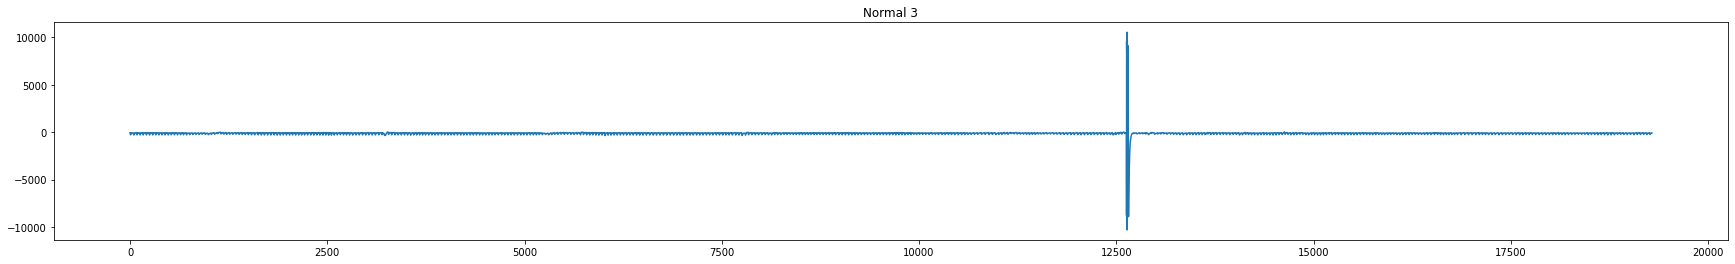

In [19]:
#Normal 3 Signal
plt.figure(figsize=(30,4))
plt.title("Normal 3")
plt.plot(normal3.index, normal3['Pleth'])

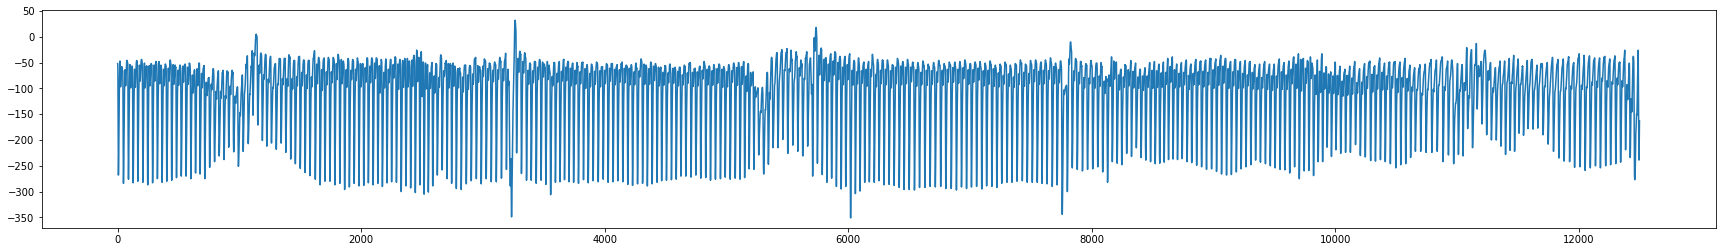

In [20]:
#Normal 3 (1)
plt.figure(figsize=(30,4))
plt.plot(normal3.index[:12500], normal3['Pleth'][:12500])
normal3_1 = normal3[:12500]

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\complexity\fractal_higuchi.py:198: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. HFD is returned for kmax value of 20.
  warn(


    HRV_SDNN   HRV_SDSD  HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  62.753954  89.429662  89.281533  16.831683   5.280528     14.826


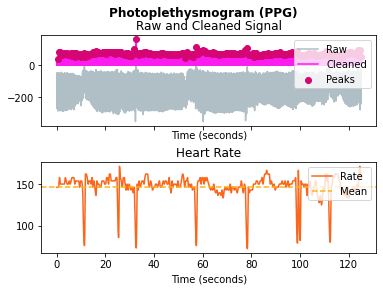

In [21]:
signals_normal3_1, info = nk.ppg_process(normal3_1["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_normal3_1, sampling_rate=100)

raw_feature_normal3_1 = nk.ppg_intervalrelated(signals_normal3_1, sampling_rate=100)

features_normal3_1 = raw_feature_normal3_1[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
print(features_normal3_1)

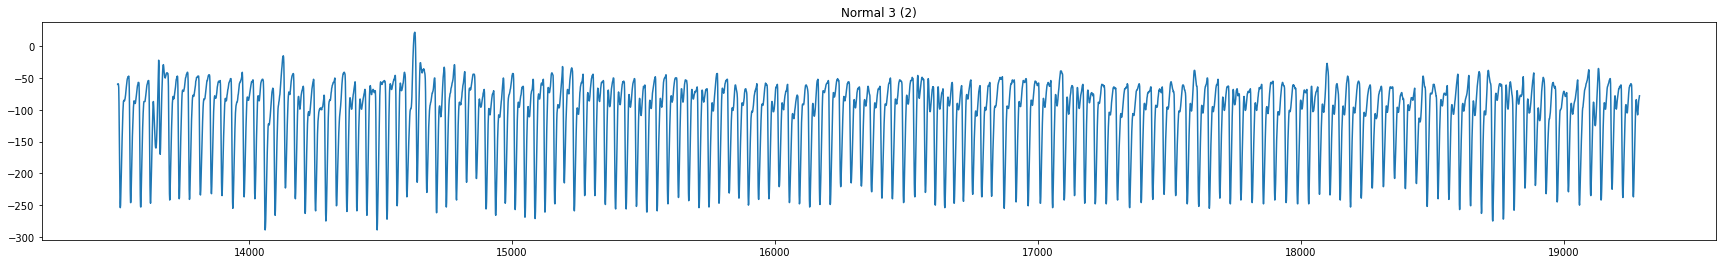

In [22]:
#Normal 3 (2)
plt.figure(figsize=(30,4))
plt.title("Normal 3 (2)")
plt.plot(normal3.index[13500:], normal3['Pleth'][13500:])
normal3_2 = normal3[13500:]
normal3_2.reset_index(drop=True,inplace=True)

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\complexity\fractal_higuchi.py:198: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. HFD is returned for kmax value of 20.
  warn(


    HRV_SDNN   HRV_SDSD  HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  62.237165  85.046114  84.737446  25.179856  12.230216     29.652


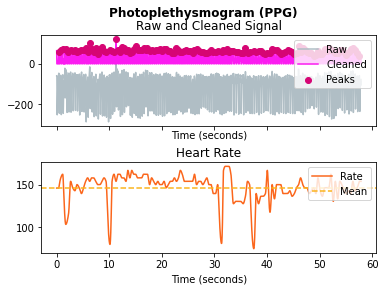

In [23]:
signals_normal3_2, info = nk.ppg_process(normal3_2["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_normal3_2, sampling_rate=100)

raw_feature_normal3_2 = nk.ppg_intervalrelated(signals_normal3_2, sampling_rate=100)

features_normal3_2 = raw_feature_normal3_2[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
print(features_normal3_2)

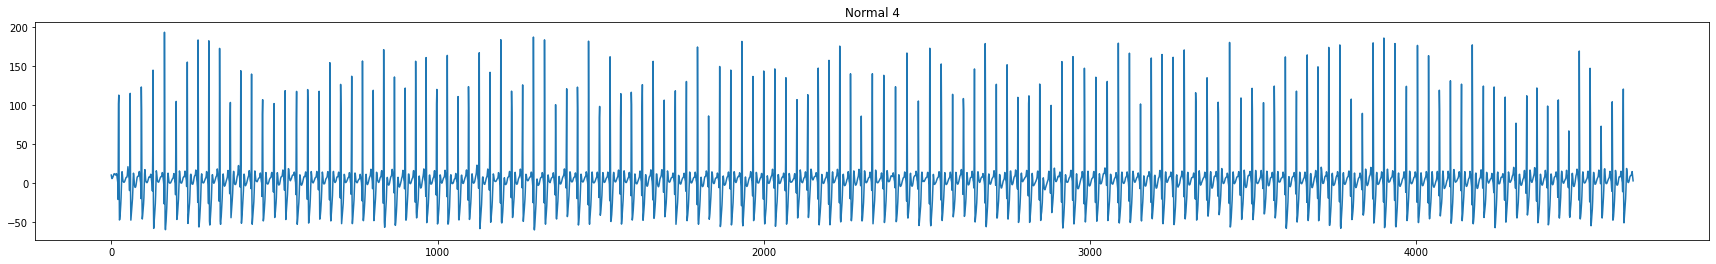

In [24]:
#Normal 4 Signal
plt.figure(figsize=(30,4))
plt.title("Normal 4")
plt.plot(normal4.index, normal4['Pleth'])

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\hrv\hrv_nonlinear.py:483: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\complexity\fractal_higuchi.py:198: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. HFD is returned for kmax value of 20.
  warn(


    HRV_SDNN    HRV_SDSD   HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  94.175403  127.881398  127.364729       22.4       14.4     14.826


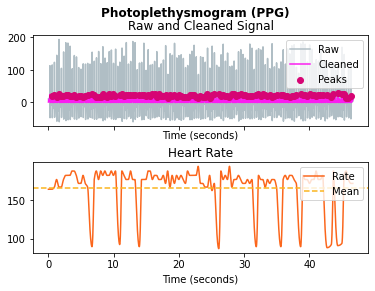

In [25]:
signals_normal4, info = nk.ppg_process(normal4["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_normal4, sampling_rate=100)

raw_feature_normal4 = nk.ppg_intervalrelated(signals_normal4, sampling_rate=100)

features_normal4 = raw_feature_normal4[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
print(features_normal4)

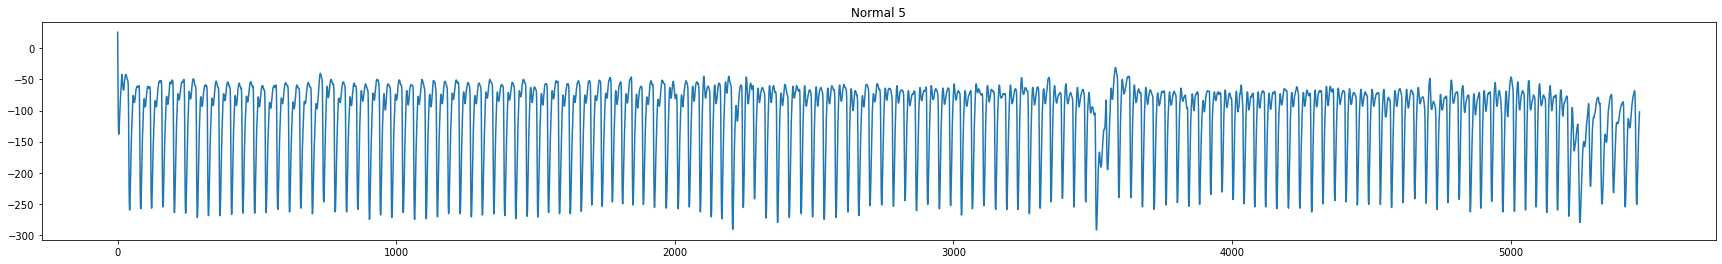

In [26]:
#Normal 5 Signal
plt.figure(figsize=(30,4))
plt.title("Normal 5")
plt.plot(normal5.index, normal5['Pleth'])

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\hrv\hrv_nonlinear.py:483: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\complexity\fractal_higuchi.py:198: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. HFD is returned for kmax value of 20.
  warn(


     HRV_SDNN   HRV_SDSD   HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  122.432444  152.01149  151.382063  29.508197  20.491803     14.826


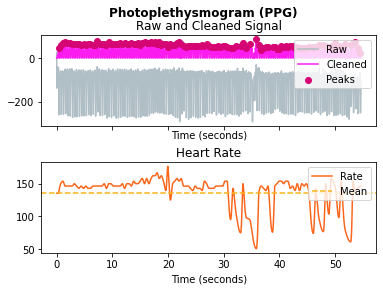

In [27]:
signals_normal5, info = nk.ppg_process(normal5["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_normal5, sampling_rate=100)

raw_feature_normal5 = nk.ppg_intervalrelated(signals_normal5, sampling_rate=100)

features_normal5 = raw_feature_normal5[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
print(features_normal5)

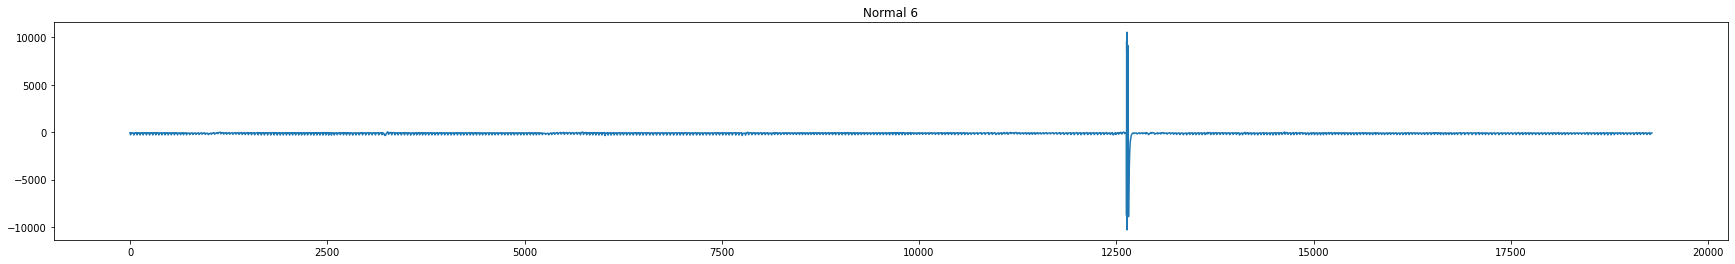

In [28]:
#Normal 6 Signal
plt.figure(figsize=(30,4))
plt.title("Normal 6")
plt.plot(normal6.index, normal6['Pleth'])

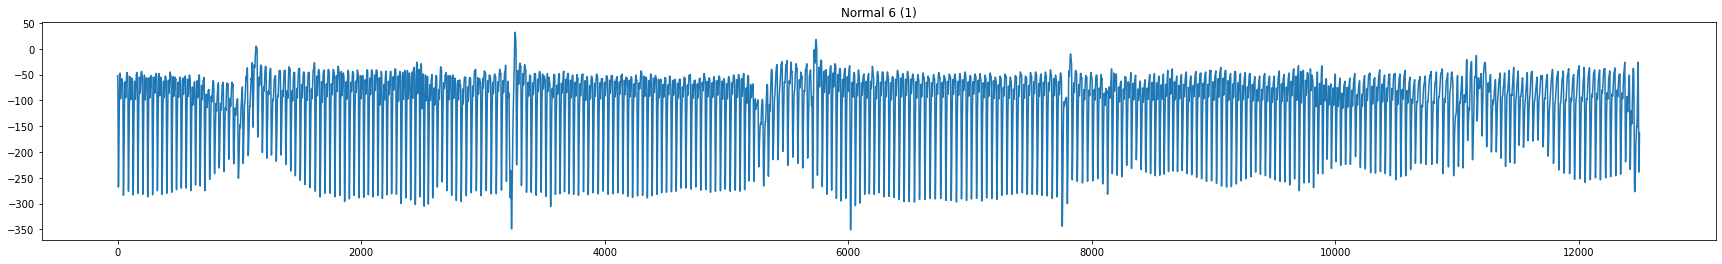

In [29]:
#Normal 6 (1)
plt.figure(figsize=(30,4))
plt.title("Normal 6 (1)")
plt.plot(normal6.index[:12500], normal6['Pleth'][:12500])
normal6_1 = normal6[:12500]

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\complexity\fractal_higuchi.py:198: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. HFD is returned for kmax value of 20.
  warn(


    HRV_SDNN   HRV_SDSD  HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  62.753954  89.429662  89.281533  16.831683   5.280528     14.826


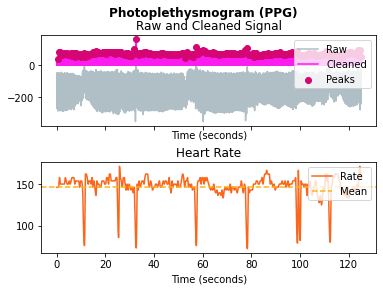

In [30]:
signals_normal6_1, info = nk.ppg_process(normal6_1["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_normal6_1, sampling_rate=100)

raw_feature_normal6_1 = nk.ppg_intervalrelated(signals_normal6_1, sampling_rate=100)

features_normal6_1 = raw_feature_normal6_1[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
print(features_normal6_1)

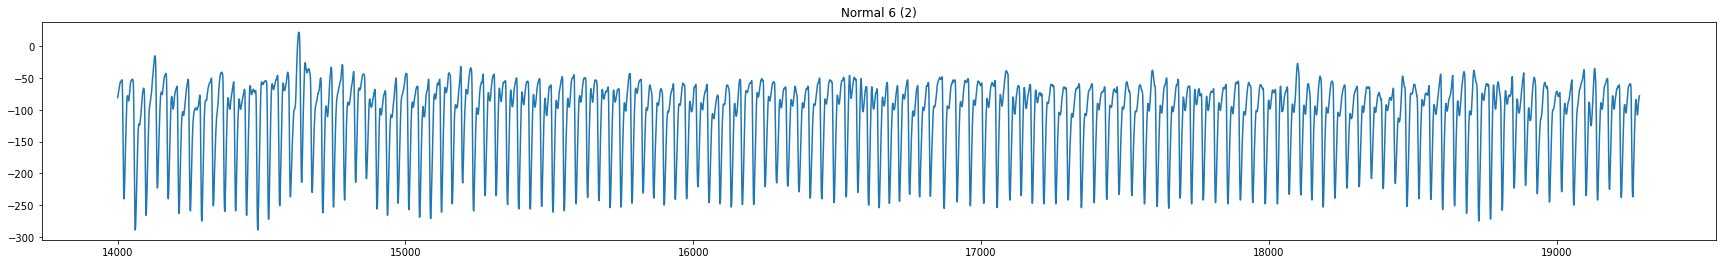

In [31]:
plt.figure(figsize=(30,4))
plt.title("Normal 6 (2)")
plt.plot(normal6.index[14000:], normal6['Pleth'][14000:])
normal6_2 = normal6[14000:]
normal6_2.reset_index(drop=True,inplace=True)

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\hrv\hrv_nonlinear.py:483: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(


    HRV_SDNN   HRV_SDSD  HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  62.347427  85.972052   85.63025   25.19685  11.023622     29.652


C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\complexity\fractal_higuchi.py:198: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. HFD is returned for kmax value of 20.
  warn(


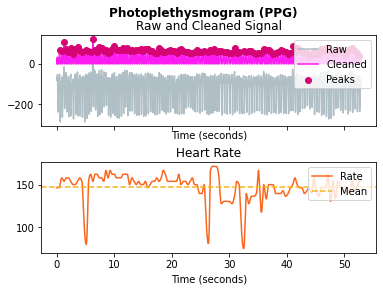

In [32]:
signals_normal6_2, info = nk.ppg_process(normal6_2["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_normal6_2, sampling_rate=100)

raw_feature_normal6_2 = nk.ppg_intervalrelated(signals_normal6_2, sampling_rate=100)

features_normal6_2 = raw_feature_normal6_2[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
print(features_normal6_2)

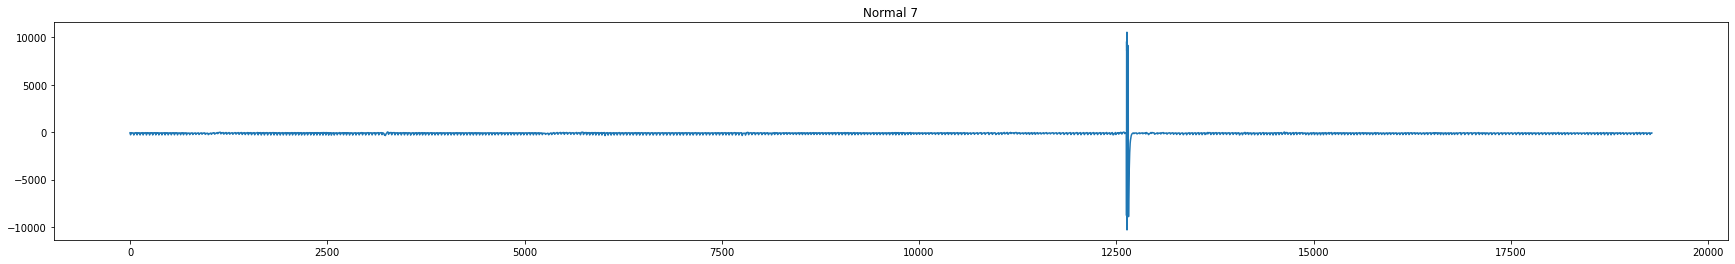

In [33]:
#Normal 7 Signal
plt.figure(figsize=(30,4))
plt.title("Normal 7")
plt.plot(normal7.index, normal7['Pleth'])

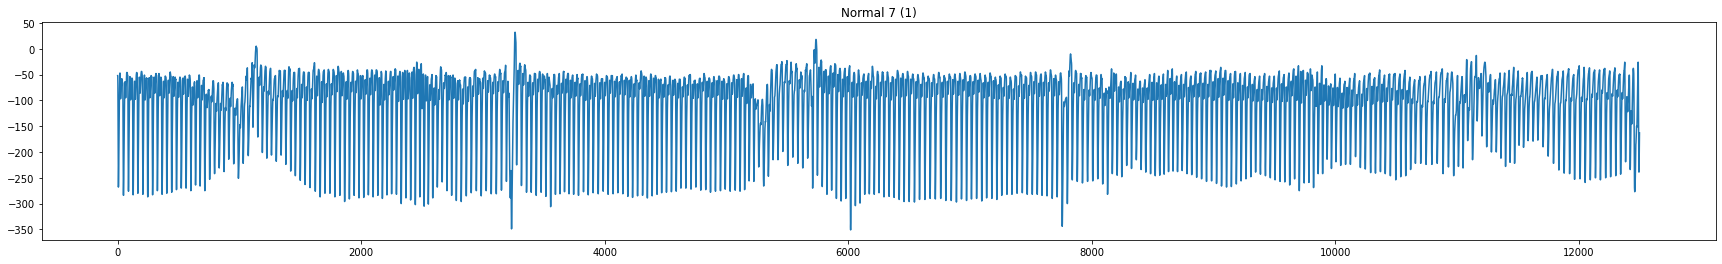

In [34]:
#Normal 7 (1)
plt.figure(figsize=(30,4))
plt.title("Normal 7 (1)")
plt.plot(normal7.index[:12500], normal7['Pleth'][:12500])
normal7_1 = normal7[:12500]

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\complexity\fractal_higuchi.py:198: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. HFD is returned for kmax value of 20.
  warn(


    HRV_SDNN   HRV_SDSD  HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  62.753954  89.429662  89.281533  16.831683   5.280528     14.826


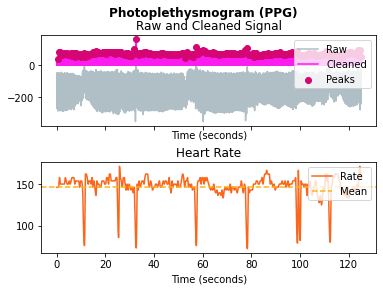

In [35]:
signals_normal7_1, info = nk.ppg_process(normal7_1["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_normal7_1, sampling_rate=100)

raw_feature_normal7_1 = nk.ppg_intervalrelated(signals_normal7_1, sampling_rate=100)

features_normal7_1 = raw_feature_normal7_1[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
print(features_normal7_1)

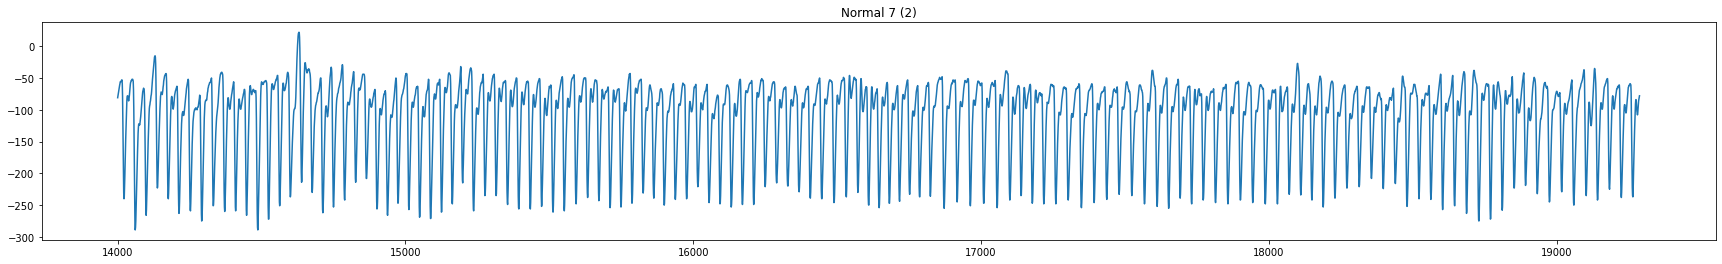

In [36]:
#Normal 7 (2)
plt.figure(figsize=(30,4))
plt.title("Normal 7 (2)")
plt.plot(normal7.index[14000:], normal7['Pleth'][14000:])
normal7_2 = normal7[14000:]
normal7_2.reset_index(drop=True,inplace=True)

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\hrv\hrv_nonlinear.py:483: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\complexity\fractal_higuchi.py:198: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. HFD is returned for kmax value of 20.
  warn(


    HRV_SDNN   HRV_SDSD  HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  62.347427  85.972052   85.63025   25.19685  11.023622     29.652


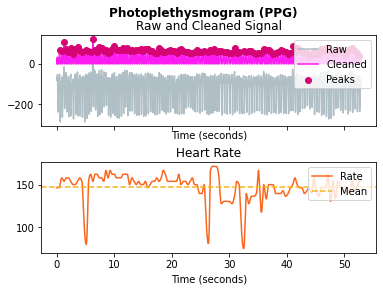

In [37]:
signals_normal7_2, info = nk.ppg_process(normal7_2["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_normal7_2, sampling_rate=100)

raw_feature_normal7_2 = nk.ppg_intervalrelated(signals_normal7_2, sampling_rate=100)

features_normal7_2 = raw_feature_normal7_2[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
print(features_normal7_2)

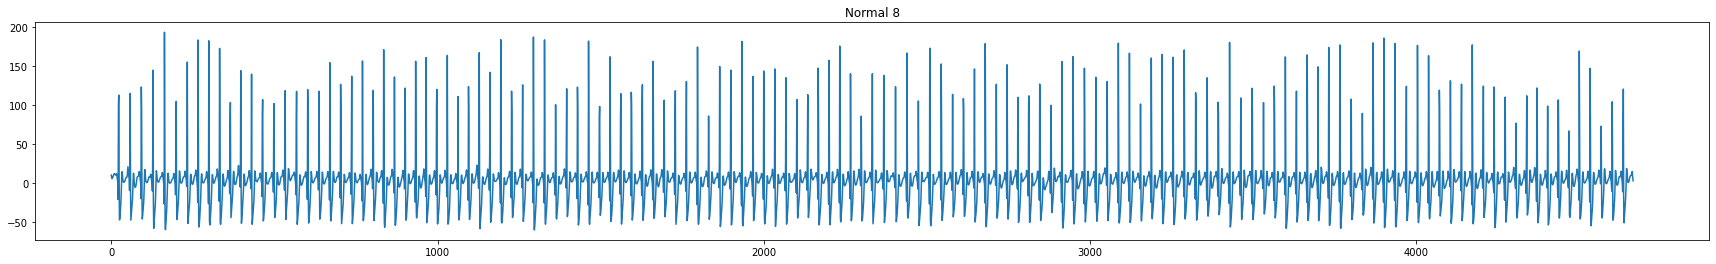

In [38]:
#Normal 8 Signal
plt.figure(figsize=(30,4))
plt.title("Normal 8")
plt.plot(normal8.index, normal8['Pleth'])

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\hrv\hrv_nonlinear.py:483: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\complexity\fractal_higuchi.py:198: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. HFD is returned for kmax value of 20.
  warn(


    HRV_SDNN    HRV_SDSD   HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  94.175403  127.881398  127.364729       22.4       14.4     14.826


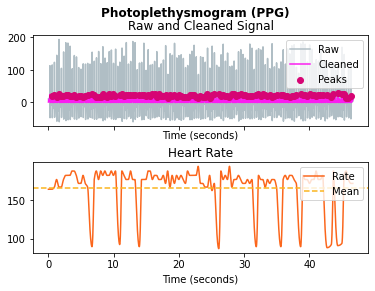

In [39]:
signals_normal8, info = nk.ppg_process(normal8["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_normal8, sampling_rate=100)

raw_feature_normal8 = nk.ppg_intervalrelated(signals_normal8, sampling_rate=100)

features_normal8 = raw_feature_normal8[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
print(features_normal8)

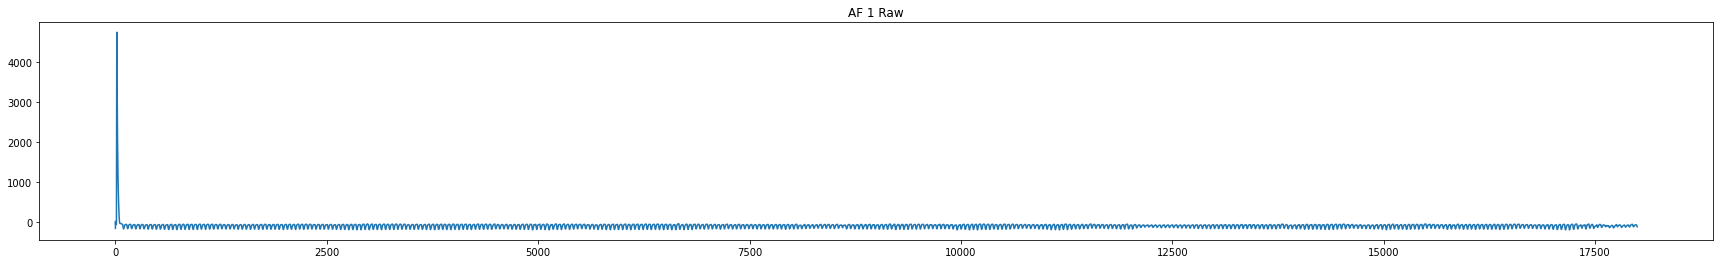

In [40]:
#AF 1 Signal
plt.figure(figsize=(30,4))
plt.title("AF 1 Raw")
plt.plot(AF1.index, AF1['Pleth'])

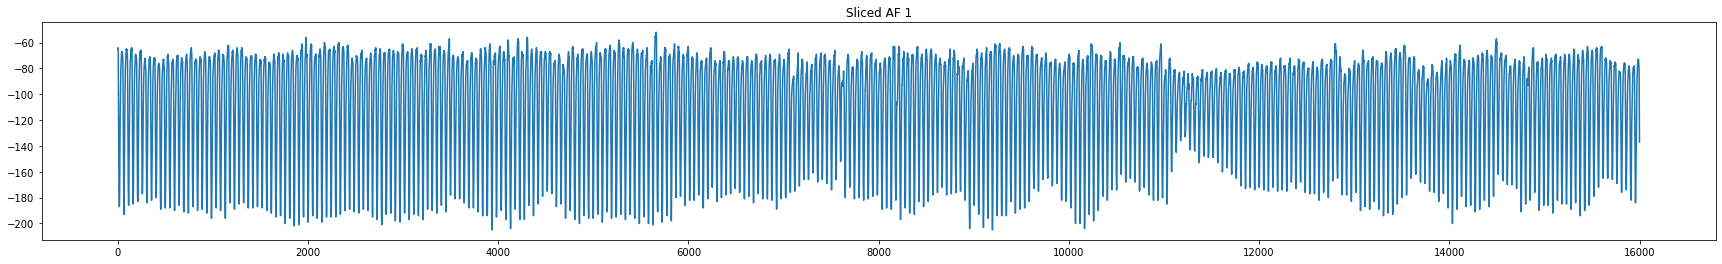

In [41]:
#Sliced AF 1
AF1 = AF1[1000:17000]
AF1.reset_index(drop=True,inplace=True)
plt.figure(figsize=(30,4))
plt.title("Sliced AF 1")
plt.plot(AF1.index, AF1['Pleth'])

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\complexity\fractal_higuchi.py:198: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. HFD is returned for kmax value of 20.
  warn(


    HRV_SDNN   HRV_SDSD  HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  30.905659  52.406464  52.326951  31.914894  17.021277     14.826


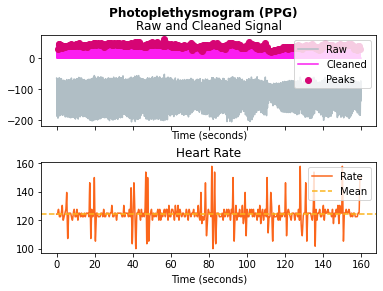

In [42]:
signals_AF1, info = nk.ppg_process(AF1["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_AF1, sampling_rate=100)

raw_feature_AF1 = nk.ppg_intervalrelated(signals_AF1, sampling_rate=100)

features_AF1 = raw_feature_AF1[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
print(features_AF1)

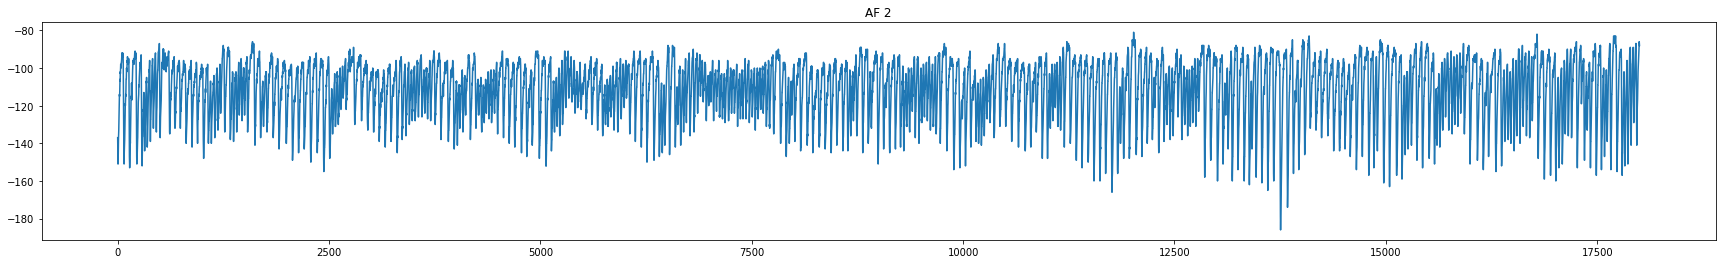

In [43]:
#AF 2 Signal
plt.figure(figsize=(30,4))
plt.title("AF 2")
plt.plot(AF2.index, AF2['Pleth'])

     HRV_SDNN    HRV_SDSD   HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  181.531152  185.065469  184.770819  78.980892  62.420382    229.803


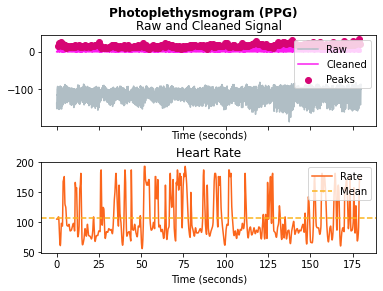

In [44]:
signals_AF2, info = nk.ppg_process(AF2["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_AF2, sampling_rate=100)

raw_feature_AF2 = nk.ppg_intervalrelated(signals_AF2, sampling_rate=100)

features_AF2 = raw_feature_AF2[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
print(features_AF2)

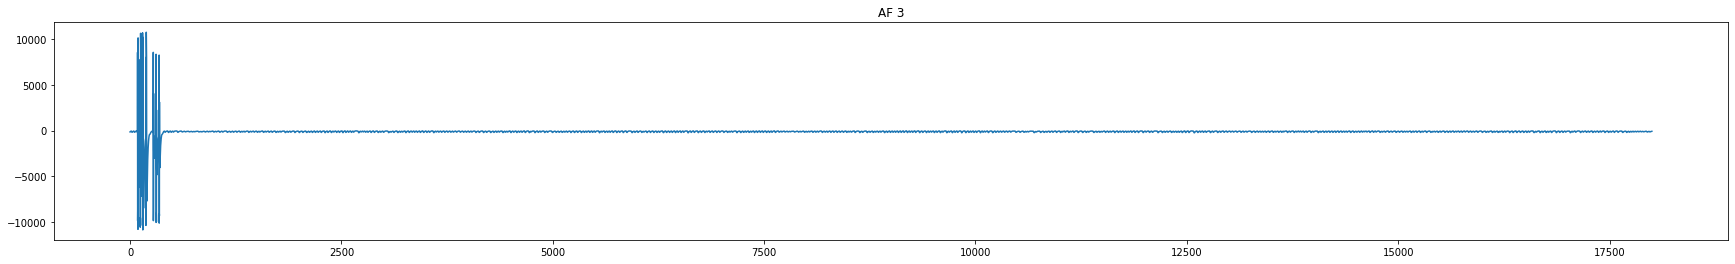

In [45]:
#AF 3 Signal
plt.figure(figsize=(30,4))
plt.title("AF 3")
plt.plot(AF3.index, AF3['Pleth'])

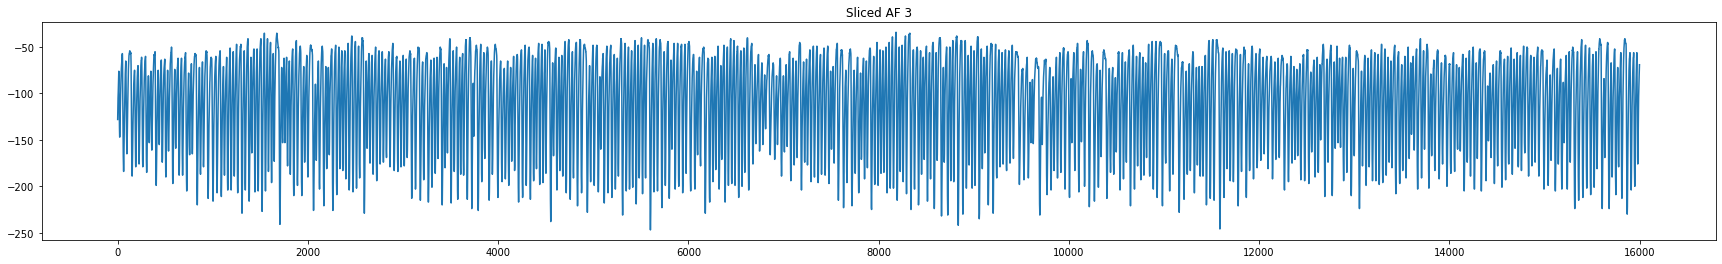

In [46]:
#Sliced AF 3
AF3 = AF3[1000:17000]
AF3.reset_index(drop=True,inplace=True)
plt.figure(figsize=(30,4))
plt.title("Sliced AF 3")
plt.plot(AF3.index, AF3['Pleth'])

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\complexity\fractal_higuchi.py:198: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. HFD is returned for kmax value of 20.
  warn(


     HRV_SDNN    HRV_SDSD  HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  144.541529  184.511954  184.24668  81.375358  59.598854     88.956


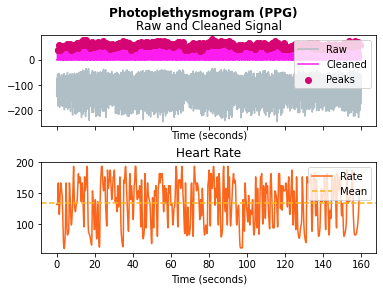

In [47]:
signals_AF3, info = nk.ppg_process(AF3["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_AF3, sampling_rate=100)

raw_feature_AF3 = nk.ppg_intervalrelated(signals_AF3, sampling_rate=100)

features_AF3 = raw_feature_AF3[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
print(features_AF3)

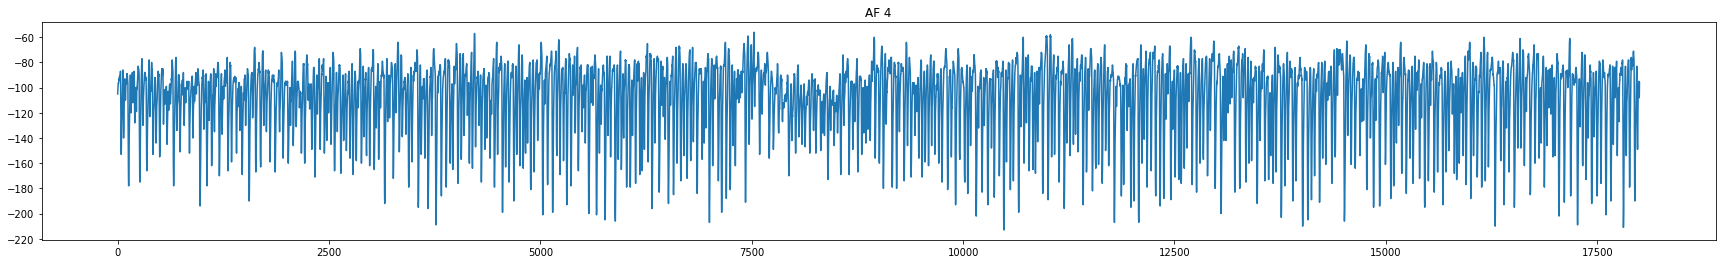

In [48]:
#AF 4 Signal
plt.figure(figsize=(30,4))
plt.title("AF 4")
plt.plot(AF4.index, AF4['Pleth'])

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\complexity\fractal_higuchi.py:198: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. HFD is returned for kmax value of 20.
  warn(


     HRV_SDNN    HRV_SDSD   HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  153.179622  221.858151  221.534537  90.406977  79.069767    163.086


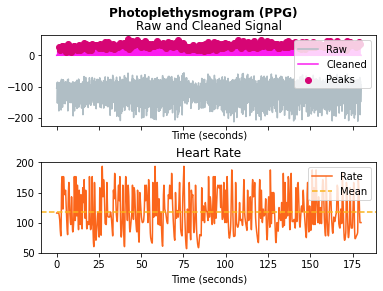

In [49]:
signals_AF4, info = nk.ppg_process(AF4["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_AF4, sampling_rate=100)

raw_feature_AF4 = nk.ppg_intervalrelated(signals_AF4, sampling_rate=100)

features_AF4 = raw_feature_AF4[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
print(features_AF4)

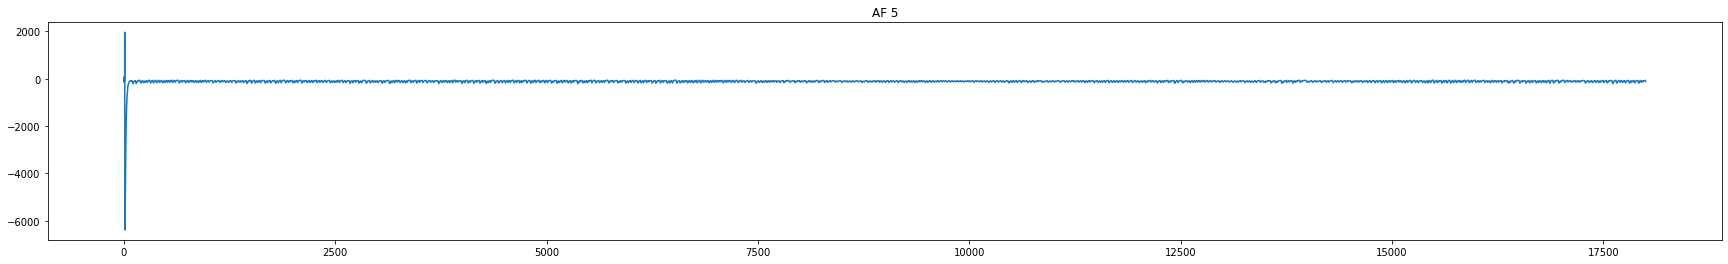

In [50]:
#AF 5 Signal
plt.figure(figsize=(30,4))
plt.title("AF 5")
plt.plot(AF5.index, AF5['Pleth'])

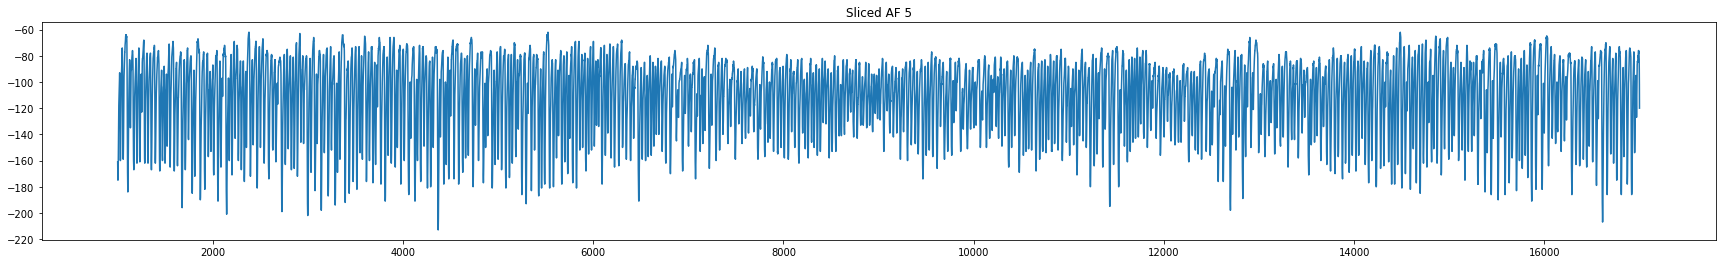

In [51]:
#Sliced AF 5
AF5 = AF5[1000:]
AF5.reset_index(drop=True,inplace=True)
plt.figure(figsize=(30,4))
plt.title("Sliced AF 5")
plt.plot(AF5.index[1000:], AF5['Pleth'][1000:])

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\neurokit2\complexity\fractal_higuchi.py:198: NeuroKitWarning: The optimal kmax value detected is 2 or less. There may be no plateau in this case. You can inspect the plot by set `show=True`. HFD is returned for kmax value of 20.
  warn(


     HRV_SDNN    HRV_SDSD   HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  150.554715  209.651002  209.341572  86.176471  72.058824     148.26


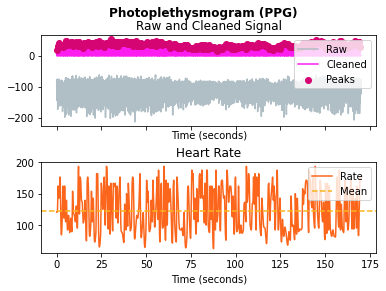

In [52]:
signals_AF5, info = nk.ppg_process(AF5["Pleth"], sampling_rate=100)
# Visualize the processing
nk.ppg_plot(signals_AF5, sampling_rate=100)

raw_feature_AF5 = nk.ppg_intervalrelated(signals_AF5, sampling_rate=100)

features_AF5 = raw_feature_AF5[["HRV_SDNN", "HRV_SDSD", "HRV_RMSSD", "HRV_pNN20", "HRV_pNN50", "HRV_MadNN"]]
print(features_AF5)

=================================================================================================================================================================================

Gathering Features

In [53]:
#Features Normal
print(features_normal1)
print(features_normal2_1)
print(features_normal2_2)
print(features_normal3_1)
print(features_normal3_2)
print(features_normal4)
print(features_normal5)
print(features_normal6_1)
print(features_normal6_2)
print(features_normal7_1)
print(features_normal7_2)
print(features_normal8)

     HRV_SDNN    HRV_SDSD   HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  128.949861  160.946356  160.199528  33.027523   22.93578     14.826
    HRV_SDNN   HRV_SDSD  HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  62.753954  89.429662  89.281533  16.831683   5.280528     14.826
    HRV_SDNN   HRV_SDSD  HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  62.237165  85.046114  84.737446  25.179856  12.230216     29.652
    HRV_SDNN   HRV_SDSD  HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  62.753954  89.429662  89.281533  16.831683   5.280528     14.826
    HRV_SDNN   HRV_SDSD  HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  62.237165  85.046114  84.737446  25.179856  12.230216     29.652
    HRV_SDNN    HRV_SDSD   HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  94.175403  127.881398  127.364729       22.4       14.4     14.826
     HRV_SDNN   HRV_SDSD   HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  122.432444  152.01149  151.382063  29.508197  20.491803     14.826
    HRV_SDNN   HRV_SDSD  HRV_RMSSD

In [54]:
#Features AF
print(features_AF1)
print(features_AF2)
print(features_AF3)
print(features_AF4)
print(features_AF5)

    HRV_SDNN   HRV_SDSD  HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  30.905659  52.406464  52.326951  31.914894  17.021277     14.826
     HRV_SDNN    HRV_SDSD   HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  181.531152  185.065469  184.770819  78.980892  62.420382    229.803
     HRV_SDNN    HRV_SDSD  HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  144.541529  184.511954  184.24668  81.375358  59.598854     88.956
     HRV_SDNN    HRV_SDSD   HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  153.179622  221.858151  221.534537  90.406977  79.069767    163.086
     HRV_SDNN    HRV_SDSD   HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0  150.554715  209.651002  209.341572  86.176471  72.058824     148.26


In [55]:
# is_af = dict{AF}
MergeDF = [
    features_normal1, 
    features_normal2_1, 
    features_normal2_2, 
    features_normal3_1, 
    features_normal3_2, 
    features_normal4, 
    features_normal5, 
    features_normal6_1, 
    features_normal6_2, 
    features_normal7_1, 
    features_normal7_2, 
    features_normal8,
    features_AF2,
    features_AF3,
    features_AF4,
    features_AF5
    ]
Features = pd.concat(MergeDF)

Features.reset_index(drop=True,inplace=True)

is_AF = [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]
Features["AF"] = is_AF
Features

HRV_SDNN    HRV_SDSD   HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN  AF
0   128.949861  160.946356  160.199528  33.027523  22.935780     14.826   0
1    62.753954   89.429662   89.281533  16.831683   5.280528     14.826   0
2    62.237165   85.046114   84.737446  25.179856  12.230216     29.652   0
3    62.753954   89.429662   89.281533  16.831683   5.280528     14.826   0
4    62.237165   85.046114   84.737446  25.179856  12.230216     29.652   0
5    94.175403  127.881398  127.364729  22.400000  14.400000     14.826   0
6   122.432444  152.011490  151.382063  29.508197  20.491803     14.826   0
7    62.753954   89.429662   89.281533  16.831683   5.280528     14.826   0
8    62.347427   85.972052   85.630250  25.196850  11.023622     29.652   0
9    62.753954   89.429662   89.281533  16.831683   5.280528     14.826   0
10   62.347427   85.972052   85.630250  25.196850  11.023622     29.652   0
11   94.175403  127.881398  127.364729  22.400000  14.400000     14.826   0
12  181.531152  185.065469  184.770819  78.980892  62.420382    229.803   1
13  144.541529  184.511954  184.246680  81.375358  59.598854     88.956   1
14  153.179622  221.858151  221.534537  90.406977  79.069767    163.086   1
15  150.554715  209.651002  209.341572  86.176471  72.058824    148.260   1

=================================================================================================================================================================================

Preprocessing Features

In [56]:
Features.iloc[[0,1,2,3,4,5,12,13,14],[0,1,2,3,4,5]]

HRV_SDNN    HRV_SDSD   HRV_RMSSD  HRV_pNN20  HRV_pNN50  HRV_MadNN
0   128.949861  160.946356  160.199528  33.027523  22.935780     14.826
1    62.753954   89.429662   89.281533  16.831683   5.280528     14.826
2    62.237165   85.046114   84.737446  25.179856  12.230216     29.652
3    62.753954   89.429662   89.281533  16.831683   5.280528     14.826
4    62.237165   85.046114   84.737446  25.179856  12.230216     29.652
5    94.175403  127.881398  127.364729  22.400000  14.400000     14.826
12  181.531152  185.065469  184.770819  78.980892  62.420382    229.803
13  144.541529  184.511954  184.246680  81.375358  59.598854     88.956
14  153.179622  221.858151  221.534537  90.406977  79.069767    163.086

In [70]:
#Feature Selection
X1 = Features.iloc[[0,1,2,3,4,5,7,8,9,12,13,14],[0,1,2,3,4,5]].values #DATASET Train
y1 = Features.iloc[[0,1,2,3,4,5,7,8,9,12,13,14],[6]].values

X2 = Features.iloc[[6,10,11,15],[0,1,2,3,4,5]].values #DATASET Test
y2 = Features.iloc[[6,10,11,15],[6]].values

#Data Scaling
from sklearn import preprocessing

Standard_scaler = preprocessing.StandardScaler()
X1 = Standard_scaler.fit_transform(X1)
X2 = Standard_scaler.fit_transform(X2)

#Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[-0.01974352  0.07041985  0.06615963 -0.55298398 -0.40178762 -0.59309433]
 [-0.75606517 -0.73127691 -0.72888352 -0.75795126 -0.76150904 -0.59309433]
 [-0.75606517 -0.73127691 -0.72888352 -0.75795126 -0.76150904 -0.59309433]
 [ 1.16052255  1.25113465  1.25365462  1.61787284  1.38110026  0.50184905]
 [-0.75606517 -0.73127691 -0.72888352 -0.75795126 -0.76150904 -0.59309433]
 [ 2.02732727  1.26267513  1.2645968   1.52973359  1.49239663  2.58224147]
 [-0.76559162 -0.80336612 -0.80510945 -0.45003315 -0.53497027 -0.37410566]
 [-0.76817546 -0.8226714  -0.82374805 -0.45065871 -0.48737567 -0.37410566]]
[[ 0.79515165  0.75980538  0.75163471 -0.16178957 -0.06509018 -0.59309433]
 [-0.76817546 -0.8226714  -0.82374805 -0.45065871 -0.48737567 -0.37410566]
 [-0.75606517 -0.73127691 -0.72888352 -0.75795126 -0.76150904 -0.59309433]
 [ 1.36294527  2.02978155  2.03209387  1.95032272  2.14913867  1.59679243]]
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 [1]]


=================================================================================================================================================================================

Classification

In [73]:
#Sklearn
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25,), random_state=1, activation='relu', learning_rate='adaptive', verbose=False, max_iter=600, )
model.fit(X_train,y_train)

model.best_loss_

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.03653068570976463

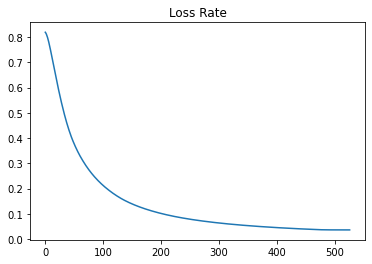

In [74]:
plt.title("Loss Rate")
plt.plot(model.loss_curve_)

In [75]:
predictions = model.predict(X_test)
predictions2 = model.predict(X2)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

from sklearn.metrics import accuracy_score
print("Akurasi dataset train   :",accuracy_score(y_test,predictions),"\n")

#Data Classification Neural Network dataset test
print("Akurasi dataset test    :",accuracy_score(y2,predictions2))

#Confusion Matrix data test
from sklearn.metrics import confusion_matrix
print("Confusion Matrix :")
print(confusion_matrix(y2,predictions2),"\n")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Akurasi dataset train   : 1.0 

Akurasi dataset test    : 1.0
Confusion Matrix :
[[3 0]
 [0 1]] 



In [62]:
#Tensorflow
# from tensorflow import keras

# X_train = X_train.reshape(-1,6*6).astype("float32") / 255.0
# X_test = X_test.reshape(-1,3*6).astype("float32") / 255.0

# model = keras.Sequential([
#     keras.Input(shape=(6*6)),
#     keras.layers.Dense(54, activation='relu'),
#     keras.layers.Dense(25, activation="relu"),
#     keras.layers.Dense(1, activation="sigmoid")
# ])

# model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=5)
# model.evaluate(X_test, y_test)

In [63]:
# loss_train = history.history['loss']
# epochs = range(0,5)
# plt.plot(epochs, loss_train, 'g', label='Training Loss')
# plt.title("Training Loss")
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [64]:
# #Normal 1
# normal1_Filtered = bandPassFilter(normal1)
# normal1_filtered = MAFilter(normal1_Filtered, 3)

# #Normal 2
# normal2_Filtered = bandPassFilter(normal2)
# normal2_filtered = MAFilter(normal2_Filtered, 3)

# #Normal 3
# normal3_Filtered = bandPassFilter(normal3)
# normal3_filtered = MAFilter(normal3_Filtered, 3)

# #Normal 4
# normal4_Filtered = bandPassFilter(normal4)
# normal4_filtered = MAFilter(normal4_Filtered, 3)

# #AF 1
# AF1_Filtered = bandPassFilter(AF1)
# AF1_Filtered = MAFilter(AF1_Filtered, 3)

# #AF 2
# AF2_Filtered = bandPassFilter(AF2)
# AF2_Filtered = MAFilter(AF2_Filtered, 3)

# #AF 3
# AF3_Filtered = bandPassFilter(AF3)
# AF3_Filtered = MAFilter(AF3_Filtered, 3)

# #AF 4
# AF4_Filtered = bandPassFilter(AF4)
# AF4_Filtered = MAFilter(AF4_Filtered, 3)

# print("Length Normal 1: ", len(normal1_Filtered))
# print("Length Normal 2: ", len(normal2_Filtered))
# print("Length Normal 3: ", len(normal3_Filtered))
# print("Length Normal 4: ", len(normal4_Filtered))
# print("Length AF 1: ", len(AF1_Filtered))
# print("Length AF 2: ", len(AF2_Filtered))
# print("Length AF 3: ", len(AF3_Filtered))
# print("Length AF 4: ", len(AF4_Filtered))